# Imports

In [4]:
# import os
from pathlib import Path

In [5]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from datasets import load_dataset, Image
from transformers import CLIPModel, CLIPProcessor

In [12]:
# import torch
from torch.utils.data import Dataset, DataLoader

# Data

In [13]:
flickr = "nlphuji/flickr30k"

In [14]:
fli_ds = load_dataset(flickr)

In [28]:
fli_ds["test"][9]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x230>,
 'caption': ['Two men in Germany jumping over a rail at the same time without shirts.',
  'Two youths are jumping over a roadside railing, at night.',
  'Boys dancing on poles in the middle of the night.',
  'Two men with no shirts jumping over a rail.',
  'Two guys jumping over a gate together'],
 'sentids': ['45', '46', '47', '48', '49'],
 'split': 'train',
 'img_id': '9',
 'filename': '1001545525.jpg'}

In [373]:
tds = fli_ds["test"]

In [103]:
# type(fli_ds)

datasets.dataset_dict.DatasetDict

In [121]:
# fli_ds["test"][3100:3105]["image"]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x320>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x451>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>]

In [380]:
bc = tds[0]["caption"]
im = tds[0]["image"]
bc, im

(['Two young guys with shaggy hair look at their hands while hanging out in the yard.',
  'Two young, White males are outside near many bushes.',
  'Two men in green shirts are standing in a yard.',
  'A man in a blue shirt standing in a garden.',
  'Two friends enjoy time spent together.'],
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>)

In [390]:
mi = processor(text=bc, images=im, return_tensors="pt", padding=True, size={"shortest_edge": 150})
ti = processor(text=bc, return_tensors="pt", padding="max_length", truncation=True, max_length=77)
mo = model(**mi)

In [403]:
to = model.text_model(**ti).last_hidden_state

In [415]:
ti["attention_mask"][0].shape

torch.Size([77])

In [423]:
to.to("cpu")

tensor([[[ 0.3393,  0.1165,  0.1020,  ...,  0.2468,  0.5906,  0.1013],
         [ 1.5388, -0.9269,  0.0027,  ...,  0.6502,  1.2769, -1.0751],
         [ 0.0807, -2.0886, -0.8193,  ..., -0.1717, -0.3324, -0.5988],
         ...,
         [ 2.5399, -0.4007,  0.2045,  ...,  0.7397, -1.7080, -1.1089],
         [ 2.5422, -0.4034,  0.2192,  ...,  0.7177, -1.6982, -1.1257],
         [ 2.5531, -0.3146,  0.2638,  ...,  0.7591, -1.6679, -0.7704]],

        [[ 0.3393,  0.1165,  0.1020,  ...,  0.2468,  0.5906,  0.1013],
         [ 1.5388, -0.9269,  0.0027,  ...,  0.6502,  1.2769, -1.0751],
         [ 0.0807, -2.0886, -0.8193,  ..., -0.1717, -0.3324, -0.5988],
         ...,
         [ 2.2746, -1.1250, -1.3414,  ...,  1.7822, -1.8096, -0.2623],
         [ 2.2667, -1.0816, -1.3873,  ...,  1.7744, -1.8107, -0.2920],
         [ 2.5246, -1.0909, -1.2906,  ...,  1.5896, -2.0629, -0.2854]],

        [[ 0.3393,  0.1165,  0.1020,  ...,  0.2468,  0.5906,  0.1013],
         [ 1.5388, -0.9269,  0.0027,  ...,  0

In [421]:
ti["input_ids"][0].shape

torch.Size([77])

In [410]:
torch.tensor(to[0].tolist()).shape

torch.Size([77, 512])

In [104]:
# img = fli_ds["test"][0]["image"]
captions = fli_ds["test"][0]["caption"]

In [122]:
# dir(img)

['_Image__transformer',
 '__annotations__',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_close_fp',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_exif_offset',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_huffman_ac',
 '_huffman_dc',
 '_im',
 '_min_frame',
 '_mode',
 '_new',
 '_open',
 '_read_dpi_from_exif',
 '_reload_exif',
 '_repr_image',
 '_repr_jpeg_',
 '_repr_png_',
 '_repr_pretty_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'apply_transpa

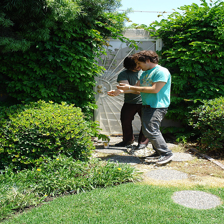

In [118]:
# img.resize((224, 224))

In [99]:
# captions

[['Two young guys with shaggy hair look at their hands while hanging out in the yard.',
  'Two young, White males are outside near many bushes.',
  'Two men in green shirts are standing in a yard.',
  'A man in a blue shirt standing in a garden.',
  'Two friends enjoy time spent together.'],
 ['Several men in hard hats are operating a giant pulley system.',
  'Workers look down from up above on a piece of equipment.',
  'Two men working on a machine wearing hard hats.',
  'Four men on top of a tall structure.',
  'Three men on a large rig.'],
 ['A child in a pink dress is climbing up a set of stairs in an entry way.',
  'A little girl in a pink dress going into a wooden cabin.',
  'A little girl climbing the stairs to her playhouse.',
  'A little girl climbing into a wooden playhouse.',
  'A girl going into a wooden building.'],
 ['Someone in a blue shirt and hat is standing on stair and leaning against a window.',
  'A man in a blue shirt is standing on a ladder cleaning a window.',
 

In [78]:
# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

In [40]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [169]:
# model.text_model.embeddings.token_embedding

Embedding(49408, 512)

In [474]:
# len(processor.tokenizer.get_vocab())

49408

In [173]:
# processor

CLIPProcessor:
- image_processor: CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

- tokenizer: CLIPTokenizerFast(name_or_path='openai/clip-vit-base-patch32', vocab_size=49408, model_max_length=77, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, spec

In [174]:
# len(processor.tokenizer)

49408

In [171]:
# model.vision_model

CLIPVisionTransformer(
  (embeddings): CLIPVisionEmbeddings(
    (patch_embedding): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (position_embedding): Embedding(50, 768)
  )
  (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (encoder): CLIPEncoder(
    (layers): ModuleList(
      (0-11): 12 x CLIPEncoderLayer(
        (self_attn): CLIPSdpaAttention(
          (k_proj): Linear(in_features=768, out_features=768, bias=True)
          (v_proj): Linear(in_features=768, out_features=768, bias=True)
          (q_proj): Linear(in_features=768, out_features=768, bias=True)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): CLIPMLP(
          (activation_fn): QuickGELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
    

In [163]:
# type(processor)

transformers.models.clip.processing_clip.CLIPProcessor

In [185]:
# inp = processor(text=captions, images=img, padding=True, return_tensors="pt")
inp.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [186]:
# op = model(**inp)
op.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [191]:
# _, i = op["logits_per_image"].topk(2)

In [201]:
# captions[i.tolist()[0]]

TypeError: list indices must be integers or slices, not list

In [ ]:
# 

In [250]:
# op["image_embeds"].squeeze().tolist()

[-0.0068685803562402725,
 0.03290710970759392,
 -0.00878952257335186,
 -0.04285396263003349,
 -0.00110356614459306,
 0.001864714315161109,
 0.04996149241924286,
 0.024585220962762833,
 0.0012732098111882806,
 -0.007449920289218426,
 0.022090787068009377,
 -0.0235744696110487,
 -0.10609575361013412,
 0.014871672727167606,
 -9.36107462621294e-05,
 -0.005559461656957865,
 -0.13383930921554565,
 0.017229599878191948,
 0.0035680453293025494,
 0.016101863235235214,
 0.06608162075281143,
 -0.010151403024792671,
 -0.009551772847771645,
 -0.01784190721809864,
 0.038331128656864166,
 -0.024819087237119675,
 0.0009879219578579068,
 0.011610826477408409,
 0.021788325160741806,
 -0.02901279553771019,
 -0.03913262113928795,
 0.009286673739552498,
 0.020069386810064316,
 -0.010194515809416771,
 0.06195051595568657,
 0.002361821476370096,
 -0.015590568073093891,
 0.021093104034662247,
 0.05367603898048401,
 -0.002724760677665472,
 -0.00510044302791357,
 0.015143224969506264,
 -0.018173260614275932,
 -

In [148]:
# op["vision_model_output"]["last_hidden_state"].shape

torch.Size([1, 50, 768])

In [151]:
# op

CLIPOutput(loss=None, logits_per_image=tensor([[32.6571, 31.0840, 32.8633, 29.8758, 24.8078]], grad_fn=<TBackward0>), logits_per_text=tensor([[32.6571],
        [31.0840],
        [32.8633],
        [29.8758],
        [24.8078]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0236,  0.0257, -0.0517,  ...,  0.0277,  0.0091,  0.0277],
        [-0.0146,  0.0540,  0.0041,  ...,  0.0012, -0.0394, -0.0297],
        [ 0.0132,  0.0682, -0.0143,  ...,  0.0200, -0.0219,  0.0311],
        [-0.0003,  0.0705, -0.0038,  ..., -0.0250, -0.0333,  0.0180],
        [ 0.0135,  0.0129, -0.0342,  ..., -0.0290, -0.0145, -0.0069]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-6.8686e-03,  3.2907e-02, -8.7895e-03, -4.2854e-02, -1.1036e-03,
          1.8647e-03,  4.9961e-02,  2.4585e-02,  1.2732e-03, -7.4499e-03,
          2.2091e-02, -2.3574e-02, -1.0610e-01,  1.4872e-02, -9.3611e-05,
         -5.5595e-03, -1.3384e-01,  1.7230e-02,  3.5680e-03,  1.6102e-02,
          6.6082e-02, -1.0151e-02, -9.551

In [251]:
# inp = processor(text=captions, images=img, padding=True, size={"shortest_edge": 125}, return_tensors="pt").to("cpu")
tinp = processor(text=captions, padding=True, size={"shortest_edge": 125}, return_tensors="pt").to("cpu")
vinp = processor(images=img, padding=True, size={"shortest_edge": 125}, return_tensors="pt").to("cpu")

In [222]:
# model.text_model(**tinp).keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [230]:
# vinp.keys()

dict_keys(['pixel_values'])

In [260]:
# imfeat = model(**inp).image_embeds.squeeze()

In [262]:
# get_imfeat = model.get_image_features(**vinp).squeeze()

In [269]:
# model.get_text_features

torch.Size([5, 512])

In [ ]:
# 

In [233]:
# model.get_text_features(**tinp).shape

torch.Size([5, 512])

In [239]:
# vals, indices = op.logits_per_image.topk(3)
indices

tensor([[2, 0, 1]])

In [242]:
# for i in indices[0].tolist():
    print(i)

2
0
1


In [212]:
# op.vision_model_output.pooler_output.shape

torch.Size([1, 768])

In [215]:
# op.vision_model_output.last_hidden_state[:, 1:, :].shape

torch.Size([1, 49, 768])

In [203]:
# type(inp)

transformers.tokenization_utils_base.BatchEncoding

In [202]:
# op = model(**inp)
type(op)

transformers.models.clip.modeling_clip.CLIPOutput

In [ ]:
# processor.tokenizer()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..2.145897].


(3, 224, 224)


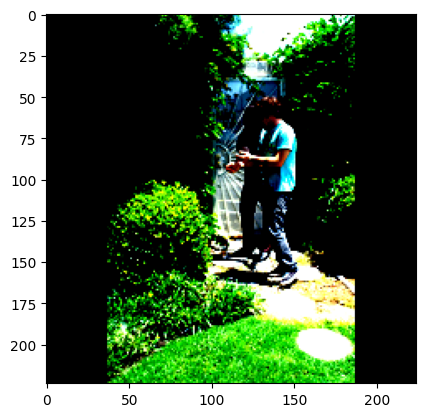

In [290]:
# img_inputs = processor(images=img, pading=True, size={"shortest_edge": 150})
img_proc = img_inputs["pixel_values"][0]
print(img_proc.shape)
plt.imshow(img_inputs["pixel_values"][0].transpose(-2, -1, 0))

In [291]:
# img = fli_ds["test"][0]["image"]
cap = fli_ds["test"][0]["caption"]

In [295]:
# inputs = processor(text=cap, images=img, return_tensors="pt", padding=True, sequence_length=100)

TypeError: PreTrainedTokenizerFast._batch_encode_plus() got an unexpected keyword argument 'sequence_length'

In [293]:
# output = model(**inputs)


In [294]:
# output.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [101]:
# output["logits_per_image"].shape

torch.Size([1, 5])

In [102]:
# output["logits_per_text"].shape

torch.Size([5, 1])

In [111]:
# vals, idxs = output["logits_per_image"].topk(2)
idxs

tensor([[2, 0]])

In [88]:
# output = model.get_image_features(**inputs)

In [93]:
# top_k = 1

In [ ]:
# for row in fli_ds["test"][:100]:
    img = row["image"]
    captions = row["caption"]
    split = row["split"]

    

    

    

In [297]:
# s = "I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to I want to "

In [300]:
# processor(text=s, truncation=True)

{'input_ids': [49406, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 328, 1280, 531, 49407], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [91]:
# 

{'pixel_values': tensor([[[[-1.5441, -1.4565, -1.4857,  ..., -1.3981, -1.3689, -1.1207],
          [-1.5733, -1.4565, -1.5587,  ..., -1.3981, -1.3251, -0.9602],
          [-1.5587, -1.5441, -1.5003,  ..., -1.3105, -1.3105, -1.5733],
          ...,
          [-0.8580, -0.9456, -0.3470,  ...,  1.6968,  1.7260,  1.7114],
          [-0.1134,  0.0909,  0.6749,  ...,  1.7260,  1.6092,  1.7406],
          [-0.3470, -0.0405,  0.3537,  ...,  1.6092,  1.4924,  1.5216]],

         [[-1.1068, -1.0617, -1.1668,  ..., -0.4914, -0.4764, -0.4014],
          [-1.2118, -1.0617, -1.1968,  ..., -0.5215, -0.3264, -0.0712],
          [-1.1968, -1.1218, -1.1818,  ..., -0.4614, -0.5065, -0.8516],
          ...,
          [ 0.0488,  0.0638,  0.4390,  ...,  1.5796,  1.6997,  1.7147],
          [ 0.7542,  0.5891,  1.1444,  ...,  1.5646,  1.5046,  1.7747],
          [ 0.4390,  0.5441,  0.8743,  ...,  1.4596,  1.4896,  1.4295]],

         [[-1.1816, -1.0536, -1.1389,  ..., -1.3665, -1.3949, -1.1532],
          [-1

In [89]:
# inputs["input_ids"].shape

KeyError: 'input_ids'

In [79]:
# inputs["attention_mask"].shape

torch.Size([5, 19])

In [92]:
# inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

In [77]:
# inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

In [287]:
# output

NameError: name 'output' is not defined

In [ ]:
# oo

In [ ]:
# 

In [ ]:
# 

In [305]:
# from pathlib import Path
from typing import Any

import pandas as pd
import torch
from datasets import DatasetDict, load_dataset
from PIL.JpegImagePlugin import JpegImageFile
from tqdm.auto import tqdm
from transformers import CLIPModel, CLIPProcessor
from transformers.models.clip.modeling_clip import CLIPOutput
from transformers.tokenization_utils_base import BatchEncoding


def process_and_save_clip_embeddings(
    output_dir: Path | str,
    topk: int = 1,
    shortest_edge: int = 224,
    device: str = "cuda" if torch.cuda.is_available() else "cpu",
) -> None:
    """
    Process Flickr30k dataset and save CLIP embeddings with topk similar captions.

    Args:
        output_dir: Directory to save the processed dataset
        split: Dataset split ('train', 'test', 'validation')
        topk: Number of most similar captions to keep per image
        batch_size: Batch size for processing
        device: Device to use for computation
    """
    # Load CLIP model and processor
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)  # type: ignore
    processor: CLIPProcessor = CLIPProcessor.from_pretrained(
        "openai/clip-vit-base-patch32"
    )  # type: ignore

    # Load Flickr dataset
    flickr = load_dataset("nlphuji/flickr30k")
    dataset: DatasetDict = flickr["test"]  # type: ignore

    # Create output directory
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Prepare output file

    data_dict = {"train": [], "test": [], "val": []}

    # Process dataset in batches
    limit = 1000
    for i, row in tqdm(enumerate(dataset), desc="Processing Dataset", total=len(dataset)):
        image: JpegImageFile = row["image"]
        captions: list[str] = row["caption"]
        split: str = row["split"]
        width, height = image.size
        image_id: int = int(row["img_id"])
        filename: str = row["filename"]

        # Pass the image & 5 captions to the CLIP Processor
        vision_input: BatchEncoding = processor(
            images=image, return_tensors="pt", size={"shortest_edge": shortest_edge}, padding=True
        )

        model_input: BatchEncoding = processor(
            text=captions,
            images=image,
            return_tensors="pt",
            size={"shortest_edge": shortest_edge},
            padding=True,
            truncation=True
        ).to(device)

        # Pass this input into CLIP to get outputs
        model_output: CLIPOutput = model(**model_input)

        # This obtains the CLS token for the image (batch_size, d_model=512)
        image_output = model.get_image_features(**vision_input).squeeze()  # type: ignore

        # We will now pick the top-k most similar captions
        vals, caption_indices = model_output["logits_per_image"].topk(k=topk)
        for idx in caption_indices[0].tolist():
            data_row = {
                "img_embedding": image_output.tolist(),
                "caption": captions[idx],
                "img_id": image_id,
                "filename": filename,
            }
            # Append the row to the data_list for the corresponding split
            data_dict[split].append(data_row)

        if i >= limit:
            break

    # Once done with making lists, create dataframes, save as parquet
    save_dataframe_parquet(
        data_dict=data_dict, topk=topk, split="train", output_dir=output_dir
    )
    save_dataframe_parquet(
        data_dict=data_dict, topk=topk, split="val", output_dir=output_dir
    )
    save_dataframe_parquet(
        data_dict=data_dict, topk=topk, split="test", output_dir=output_dir
    )


def save_dataframe_parquet(
    data_dict: dict[str, Any], topk: int, split: str, output_dir: Path | str
):
    df = pd.DataFrame(data_dict[split])
    filepath = Path(output_dir) / f"flickr_{split}_top{topk}.parquet"
    df.to_parquet(filepath)


In [306]:
# !ls ..

configs  data  datafiles  model  notebooks  utils


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Dataloader

In [ ]:
# 

In [29]:
output_dir = Path("../datafiles")

In [30]:
filepath =output_dir / "flickr_train_top1.parquet" 

In [31]:
df = pd.read_parquet(filepath)

In [32]:
i, c= df.iloc[5][["img_embedding", "caption"]]

In [33]:
# c

In [34]:
ci = processor(text=[c], return_tensors="pt",padding="max_length")
co = model.text_model(**ci, output_hidden_states=True, return_dict=True)

NameError: name 'processor' is not defined

In [26]:
# ci["input_ids"]

tensor([[49406,   320,   786,   530,  1901,  7286,   320,  5084,  1519,   518,
          1010,   786,  1411,  9915,   787,  2523,   269, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]])

In [27]:
# co.last_hidden_state.shape

torch.Size([1, 77, 512])

In [111]:
# ci["input_ids"].squeeze().shape

torch.Size([77])

In [112]:
# ci["input_ids"].squeeze()[1:].shape

torch.Size([76])

In [390]:
# ci.attention_mask

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]])

In [392]:
# ci["input_ids"]

tensor([[49406,  1237,  1656,   530,  1901,  5803,   631,  2862,   530,   320,
          4313,   269, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]])

In [371]:
# df.shape

(29000, 4)

In [366]:
# model.text_model.embeddings.token_embedding


Embedding(49408, 512)

In [399]:
# ci.attention_mask.squeeze().shape

torch.Size([77])

In [397]:
# co.last_hidden_state[:, 1:].shape

torch.Size([1, 76, 512])

In [35]:
# import os
from pathlib import Path

import pandas as pd
import torch
from datasets import Image, load_dataset
from torch.utils.data import DataLoader, Dataset
from transformers import CLIPModel, CLIPProcessor


class Flicker30K(Dataset):
    def __init__(
        self, datafile: Path | str, clip_processor: CLIPProcessor, clip_model: CLIPModel
    ):
        super().__init__()
        datafile = Path(datafile)
        if datafile.is_file() and datafile.suffix == ".parquet":
            self.dataset = pd.read_parquet(datafile)
            self.processor = clip_processor
            self.model = clip_model
        else:
            raise FileNotFoundError(f"No datafile found in {datafile}")

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img_emb, cap = self.dataset.iloc[idx][["img_embedding", "caption"]]

        img_emb = torch.tensor(img_emb)
        cap_processed = self.processor(
            text=[cap], return_tensors="pt", padding="max_length", 
        )
        cap_tokens = cap_processed["input_ids"].squeeze()  # size (77) # type: ignore
        cap_output = self.model.text_model(
            **cap_processed, output_hidden_states=True, return_dict=True
        )
        attention_mask = cap_processed.attention_mask.squeeze(0)[:-1]
        cap_emb = cap_output.last_hidden_state.squeeze()  # size (77, 512)
        cap_emb_decoder_input = cap_emb[
            1:-1, :
        ].detach()  # Don't send the last token # size (75, 512)
        cap_emb_decoder_target = cap_tokens[
            1:
        ].detach()  # Don't include the start token # size (76)

        decoder_input = torch.cat(
            (img_emb.unsqueeze(0), cap_emb_decoder_input), dim=0
        )  # size (76, 512)
        target_output = cap_emb_decoder_target  # size (76, 512)

        return {
            "decoder_input": decoder_input.type(torch.float32),
            "target_output": target_output.type(torch.float32),
            "attention_mask": attention_mask.type(torch.float32),
        }


In [41]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [42]:
filepath = output_dir / "flickr_train_top5.parquet"
filepath.is_file()

True

In [43]:
dataset = Flicker30K(filepath, clip_processor=processor, clip_model=model)

In [44]:
dl = DataLoader(dataset, batch_size=1, shuffle=False)

In [45]:
next(iter(dl))["decoder_input"].shape

torch.Size([1, 76, 512])

In [46]:
dataset[0]["target_output"].shape

torch.Size([76])

In [47]:
samp = dataset[0]["decoder_input"]
samp.shape

torch.Size([76, 512])

In [48]:
samp.dtype

torch.float32

In [49]:
next(iter(dl))["attention_mask"].shape

torch.Size([1, 76])

In [50]:
model.text_model.embeddings.position_embedding

Embedding(77, 512)

# Model

In [337]:
# import torch
import torch.nn as nn
import torch.nn.functional as F

class PositionalEmbedding(nn.Module):
    def __init__(self, seq_length: int, d_model: int):
        super().__init__()
        self.seq_length = seq_length
        self.d_model = d_model

        self.pos_embedding = nn.Parameter(
            torch.randn((self.seq_length, self.d_model)) * 0.02
        )

    def forward(self, x: torch.Tensor):
        """Receives input x and adds learnable positional embeddings to the input patches

        Args:
            x (torch.Tensor): Input tensor with shape (batch_size, seq_length, d_model)

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, seq_length, d_model)
        """

        batch_size, seq_length, d_model = x.shape

        if seq_length > self.seq_length:
            raise ValueError(
                f"Input Sequence length ({seq_length}) exceeds maximum length ({self.seq_length})"
            )

        pos_emb_trunc = self.pos_embedding[:seq_length, :]

        out = x + pos_emb_trunc

        return out


class SelfAttentionHead(nn.Module):
    def __init__(self, d_model: int, d_k: int, d_v: int | None, masked: bool = False):
        super().__init__()

        # Assign instance vars
        self.d_model = d_model
        self.d_k = d_k
        self.d_v = d_v if d_v else self.d_k
        self.masked = masked

        # Create Layers
        self.W_q = nn.Linear(in_features=d_model, out_features=self.d_k, bias=False)
        self.W_k = nn.Linear(in_features=d_model, out_features=self.d_k, bias=False)
        self.W_v = nn.Linear(in_features=d_model, out_features=self.d_v, bias=False)

    def forward(self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None):
        """Receives input x and returns Attention Weighted Vectors

        Args:
            x (torch.Tensor): Input with dims (batch_size, seq_length, d_model)
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)
        """

        # Obtain Projections
        Q = self.W_q(x)  # (batch_size, num_patches, d_k)
        K = self.W_k(x)  # (batch_size, num_patches, d_k)
        V = self.W_v(x)  # (batch_size, num_patches, d_v)

        # Compute Attention Weights
        scaling_factor = torch.sqrt(
            torch.tensor(self.d_k, device=x.device, dtype=x.dtype)
        )
        scaled_attention_map = (
            torch.einsum("bqd,bkd->bqk", Q, K) / scaling_factor
        )  # (batch_size, num_patches, num_patches)

        # TODO: Add flow to separate causal and padding masks
        if self.masked:
            causal_attention_mask = self.compute_attention_mask(scaled_attention_map)
            if custom_attn_mask is not None:
                seq_length = scaled_attention_map.shape[1]
                padding_mask = (
                    custom_attn_mask[:, :seq_length]
                    .type(torch.bool)
                    .to(scaled_attention_map.device)
                )
                padding_mask = ~padding_mask.unsqueeze(1).expand(-1, seq_length, -1)
                causal_attention_mask = causal_attention_mask | padding_mask

                scaled_attention_map = scaled_attention_map.masked_fill(
                    causal_attention_mask, -torch.inf
                )

        attention_weights = F.softmax(
            scaled_attention_map, dim=-1
        )  # Softmax over the "Key" dimension (columns)

        # Compute Attention Weighted Values
        attention_weighted_value = torch.einsum(
            "bqk,bkd->bqd", attention_weights, V
        )  # (batch_size, num_patches, d_v)

        assert attention_weighted_value.shape == (x.shape[0], x.shape[1], self.d_v)

        return attention_weighted_value

    def compute_attention_mask(
        self, scaled_attention_map: torch.Tensor
    ) -> torch.Tensor:
        causal_attention_mask = torch.triu(
            torch.ones_like(scaled_attention_map, dtype=torch.bool), diagonal=1
        ).to(scaled_attention_map.device)

        return causal_attention_mask

class SelfAttentionHead(nn.Module):
    def __init__(self, d_model: int, d_k: int, d_v: int | None, masked: bool = False):
        super().__init__()

        # Assign instance vars
        self.d_model = d_model
        self.d_k = d_k
        self.d_v = d_v if d_v else self.d_k
        self.masked = masked

        # Create Layers
        self.W_q = nn.Linear(in_features=d_model, out_features=self.d_k, bias=False)
        self.W_k = nn.Linear(in_features=d_model, out_features=self.d_k, bias=False)
        self.W_v = nn.Linear(in_features=d_model, out_features=self.d_v, bias=False)

    def forward(self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None):
        """Receives input x and returns Attention Weighted Vectors

        Args:
            x (torch.Tensor): Input with dims (batch_size, seq_length, d_model)
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)
        """

        # Obtain Projections
        Q = self.W_q(x)  # (batch_size, num_patches, d_k)
        K = self.W_k(x)  # (batch_size, num_patches, d_k)
        V = self.W_v(x)  # (batch_size, num_patches, d_v)

        # Compute Attention Weights
        scaling_factor = torch.sqrt(
            torch.tensor(self.d_k, device=x.device, dtype=x.dtype)
        )
        scaled_attention_map = (
            torch.einsum("bqd,bkd->bqk", Q, K) / scaling_factor
        )  # (batch_size, num_patches, num_patches)

        # TODO: Add flow to separate causal and padding masks
        if self.masked:
            causal_attention_mask = self.compute_attention_mask(scaled_attention_map)
            if custom_attn_mask is not None:
                # Convert mask to proper shape: [batch_size, 1, seq_length]
                # and expand to [batch_size, seq_length, seq_length]
                seq_length = scaled_attention_map.shape[1]
                padding_mask = custom_attn_mask[:, :seq_length].bool().to(scaled_attention_map.device)
                padding_mask = padding_mask.unsqueeze(1).expand(-1, seq_length, -1)
                
                # Combine masks:
                # - causal_attention_mask prevents looking ahead
                # - padding_mask allows attending only to valid tokens
                attention_mask = causal_attention_mask | ~padding_mask
                
                # Debug mask information
                print("\nMask Debug Info:")
                print(f"Causal mask shape: {causal_attention_mask.shape}")
                print(f"Padding mask shape: {padding_mask.shape}")
                print(f"Combined mask shape: {attention_mask.shape}")
                print(f"Attention map shape: {scaled_attention_map.shape}")
                print(f"Number of True values in causal mask: {causal_attention_mask.sum().item()}")
                print(f"Number of True values in padding mask: {padding_mask.sum().item()}")
                print(f"Number of True values in combined mask: {attention_mask.sum().item()}")
                print(f"Sample of attention weights before masking:\n{scaled_attention_map[0, :15, :15]}")
                
                # Apply mask (mask out with -inf where attention_mask is True)
                scaled_attention_map = scaled_attention_map.masked_fill(
                    attention_mask, float('-inf')
                )
                print(f"Sample of attention weights after masking:\n{scaled_attention_map[0, :15, :15]}")


        attention_weights = F.softmax(
            scaled_attention_map, dim=-1
        )  # Softmax over the "Key" dimension (columns)

        # Compute Attention Weighted Values
        attention_weighted_value = torch.einsum(
            "bqk,bkd->bqd", attention_weights, V
        )  # (batch_size, num_patches, d_v)

        assert attention_weighted_value.shape == (x.shape[0], x.shape[1], self.d_v)

        return attention_weighted_value

    def compute_attention_mask(
        self, scaled_attention_map: torch.Tensor
    ) -> torch.Tensor:
        causal_attention_mask = torch.triu(
            torch.ones_like(scaled_attention_map, dtype=torch.bool), diagonal=1
        ).to(scaled_attention_map.device)

        return causal_attention_mask



class MultiHeadedSelfAttention(nn.Module):
    def __init__(
        self,
        d_model: int,
        h: int,
        dropout: float | None = None,
        masked: bool = False,
    ):
        super().__init__()

        assert d_model % h == 0
        self.d_model = d_model
        self.h = h
        self.d_k = d_model // h
        self.d_v = self.d_k  # By doing this, I lose flexibility in setting d_v
        self.masked = masked

        # Create h AttentionHeads
        self.attention_heads = nn.ModuleList(
            [
                SelfAttentionHead(self.d_model, self.d_k, self.d_v, masked=self.masked)
                for _ in range(self.h)
            ]
        )

        # Create a layer to project it back to d_model (parameterized transformation!)
        self.W_o = nn.Linear(self.d_model, self.d_model)

        self.dropout = nn.Dropout(dropout) if dropout else None

    def forward(self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None):
        """Receives input x and returns Attention Weighted Vectors

        Args:
            x (torch.Tensor): Input with dims (batch_size, num_patches, d_model)
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)
        """

        # NOTE: It is possible to parallelize obtaining the outputs from the attention heads

        # Obtain Attention Head Outputs from each head
        attention_head_outputs = [
            head(x, custom_attn_mask) for head in self.attention_heads
        ]  # (batch_size, num_patches, d_v)

        # Concatenate the outputs along the last dimension
        combined_attention = torch.cat(
            attention_head_outputs, dim=-1
        )  # (batch_size, num_patches, d_model)

        # Project it linearly to allow interaction between attention head outputs
        output = self.W_o(combined_attention)  # (batch_size, num_patches, d_model)

        # Apply dropout if present
        if self.dropout:
            output = self.dropout(output)

        return output



class DecoderBlock(nn.Module):
    def __init__(
        self,
        d_model: int,
        num_heads: int,
        mlp_ratio: float,
        dropout: float | None,
    ):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.mlp_ratio = mlp_ratio
        self.dropout = dropout

        # Sublayer 1
        self.layer_norm1 = nn.LayerNorm(d_model)
        self.masked_self_attention = MultiHeadedSelfAttention(
            self.d_model, self.num_heads, self.dropout, masked=True
        )

        # Sublayer 3
        self.layer_norm3 = nn.LayerNorm(d_model)
        self.mlp = self._build_mlp_layer()

        if self.dropout:
            self.dropout_layer = nn.Dropout(self.dropout)

    def _debug_tensor(self, name: str, tensor: torch.Tensor):
        """Helper to debug tensor values"""
        print(f"\n=== {name} ===")
        print(f"Shape: {tensor.shape}")
        print(f"Mean: {tensor.mean().item():.6f}")
        print(f"Std: {tensor.std().item():.6f}")
        print(f"Max: {tensor.max().item():.6f}")
        print(f"Min: {tensor.min().item():.6f}")
        print(f"Has NaN: {torch.isnan(tensor).any().item()}")
        print(f"Has Inf: {torch.isinf(tensor).any().item()}")

    def forward(self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None):
        """Receives input x and Query/Key values from Encoder and transforms it with an Decoder Block (Masked MultiHeadedAttention, Cross Attention, MLP, Residual Connection)

        Args:
            x (torch.Tensor): Input with dims (batch_size, seq_length, d_model)
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)
        """

        # Sublayer 1
        residual = x
        x = self.layer_norm1(x)
        x = self.masked_self_attention(x, custom_attn_mask)
        if self.dropout:
            x = self.dropout_layer(x)
        x = x + residual

        # Sublayer 3
        residual = x
        x = self.layer_norm3(x)
        x = self.mlp(x)
        if self.dropout:
            x = self.dropout_layer(x)
        output = x + residual

        return output

    def _build_mlp_layer(self) -> nn.Sequential:
        hidden_dimension = int(self.d_model * (1 + self.mlp_ratio))
        mlp = nn.Sequential(
            nn.Linear(self.d_model, hidden_dimension),
            nn.GELU(),
            nn.Linear(hidden_dimension, self.d_model),
        )
        return mlp


class Decoder(nn.Module):
    def __init__(
        self,
        input_dim: int,
        seq_length: int,
        d_model: int,
        num_decoder_blocks: int,
        num_heads: int,
        mlp_ratio: float,
        dropout: float | None = None,
        num_classes: int = 10,
    ):
        super().__init__()

        self.input_dim = input_dim
        self.seq_length = seq_length
        self.d_model = d_model
        self.num_decoder_blocks = num_decoder_blocks
        self.num_heads = num_heads
        self.mlp_ratio = mlp_ratio
        self.dropout = dropout
        self.num_classes = num_classes

        # Initialize the layers

        # Project the input vector dimension to the model dimension
        self.projection_layer = nn.Linear(self.input_dim, self.d_model)

        # Positional embedding for sequence positions
        self.pos_embedding = PositionalEmbedding(
            seq_length=self.seq_length, d_model=self.d_model
        )

        # Initialize the Decoder Blocks
        self.decoder_blocks = nn.ModuleList(
            [
                DecoderBlock(self.d_model, self.num_heads, self.mlp_ratio, self.dropout)
                for _ in range(self.num_decoder_blocks)
            ]
        )

        self.output_projection = nn.Linear(self.d_model, self.num_classes)

    def _debug_tensor(self, name: str, tensor: torch.Tensor):
        """Helper to debug tensor values"""
        print(f"\n=== {name} ===")
        print(f"Shape: {tensor.shape}")
        print(f"Dtype: {tensor.dtype}")
        print(f"Mean: {tensor.mean().item():.6f}")
        print(f"Std: {tensor.std().item():.6f}")
        print(f"Max: {tensor.max().item():.6f}")
        print(f"Min: {tensor.min().item():.6f}")
        print(f"Has NaN: {torch.isnan(tensor).any().item()}")
        print(f"Has Inf: {torch.isinf(tensor).any().item()}")

    def forward(
        self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None
    ) -> torch.Tensor:
        """Forward pass through the Decoder.

        Args:
            x (torch.Tensor): Input embedded sequence of shape (batch_size, seq_length=76, emb_dim=512).
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)

        Process:
            1. Training Mode (teacher forcing):
               - Input sequence [CLS, x₁,x₂,x₃,x₄]
               - Model predicts [x₁,x₂,x₃,x₄, x_5]
               - All positions processed in parallel

        Returns:
            torch.Tensor: Logits for each position in sequence.
                         Shape: (batch_size, seq_length, num_classes)
        """
        if custom_attn_mask is not None:
            if custom_attn_mask.dim() != 2:
                raise ValueError(f"Expected 2D mask, got {custom_attn_mask.dim()}D")
            if custom_attn_mask.shape[0] != x.shape[0]:
                raise ValueError(
                    f"Mask batch size {custom_attn_mask.shape[0]} doesn't match input batch size {x.shape[0]}"
                )
            if custom_attn_mask.shape[1] < x.shape[1]:
                raise ValueError(
                    f"Mask sequence length {custom_attn_mask.shape[1]} is shorter than input sequence length {x.shape[1]}"
                )

        batch_size = x.shape[0]

        # Prepend start token to sequence, exlude last token
        input_tokens = x  # (batch_size, seq_length=76, d_model)

        input_tokens = self.projection_layer(
            input_tokens
        )  # Project to model dimension (batch_size, seq_length, d_model)

        # Add position embedding
        decoder_input = self.pos_embedding(
            input_tokens
        )  # (batch_size, seq_length, d_model)

        # Pass through decoder blocks
        decoder_output = decoder_input
        for i, decoder_block in enumerate(self.decoder_blocks):
            decoder_output = decoder_block(decoder_output)

        # Project to num_classes for output prediction
        logits = self.output_projection(
            decoder_output
        )  # (batch_size, seq_length, num_classes)

        return logits

    def inference(
        self,
        decoder_input: torch.Tensor | None,
        image: Image | None,
        clip_model: CLIPModel,
        clip_processor: CLIPProcessor,
        device: str = "cuda" if torch.cuda.is_available() else "cpu",
        temperature: float = 0.7,
        top_k: int = 50,
        max_length: int | None = None,
    ):
        """Generate a caption using the trained decoder model.

        Args:
            decoder_input: Optional pre-computed embeddings
            image: Optional input image to caption
            clip_model: CLIP model for computing embeddings
            clip_processor: CLIP processor for tokenization
            device: Device to run inference on
            temperature: Sampling temperature (higher = more diverse)
            top_k: Number of highest probability tokens to keep
            max_length: Maximum caption length
        """
        self.eval()

        with torch.no_grad():
            # Get initial sequence embedding
            if decoder_input is not None:
                # Use provided embeddings (e.g. from training data)
                current_sequence = decoder_input[:, :1, :].to(device)
            else:
                # Compute embeddings from image
                inputs = clip_processor(
                    images=image, return_tensors="pt", padding=True
                ).to(device)

                image_features = clip_model.get_image_features(**inputs)  # type: ignore
                current_sequence = image_features.unsqueeze(1)

            # Initialize generation
            max_length = max_length or self.seq_length
            generated_tokens = []

            # Get special token IDs
            bos_token_id, eos_token_id = clip_processor.tokenizer.all_special_ids  # type: ignore

            for step in range(max_length):
                # Get model predictions
                logits = self.forward(current_sequence)
                next_token_logits = logits[:, -1, :]

                # Apply temperature
                next_token_logits = next_token_logits / temperature

                # Filter special tokens (only allow EOS)
                next_token_logits[:, bos_token_id] = float("-inf")

                # Apply top-k filtering
                top_k_logits, top_k_indices = torch.topk(next_token_logits, top_k)
                next_token_logits = torch.full_like(next_token_logits, float("-inf"))
                next_token_logits.scatter_(1, top_k_indices, top_k_logits)

                # Sample next token
                probs = torch.softmax(next_token_logits, dim=-1)
                next_token = torch.multinomial(probs, num_samples=1)
                token_id = next_token.item()

                # Stop if EOS token
                if token_id == eos_token_id:
                    break

                generated_tokens.append(token_id)

                # Get embedding for next token
                token_inputs = torch.tensor([[token_id]], device=device)
                token_outputs = clip_model.text_model(
                    token_inputs, output_hidden_states=True, return_dict=True
                )
                token_embedding = token_outputs.last_hidden_state

                # Update sequence
                current_sequence = torch.cat([current_sequence, token_embedding], dim=1)

                # Debug output
                if step % 5 == 0:
                    partial_caption = clip_processor.tokenizer.decode(generated_tokens)  # type: ignore
                    print(f"Step {step}: {partial_caption}")

            # Decode final caption
            caption = clip_processor.tokenizer.decode(generated_tokens)  # type: ignore
            print(f"\nFinal caption: {caption}")

            return caption, generated_tokens


In [345]:
class SelfAttentionHead(nn.Module):
    def __init__(self, d_model: int, d_k: int, d_v: int | None, masked: bool = False):
        super().__init__()

        # Assign instance vars
        self.d_model = d_model
        self.d_k = d_k
        self.d_v = d_v if d_v else self.d_k
        self.masked = masked

        # Create Layers
        self.W_q = nn.Linear(in_features=d_model, out_features=self.d_k, bias=False)
        self.W_k = nn.Linear(in_features=d_model, out_features=self.d_k, bias=False)
        self.W_v = nn.Linear(in_features=d_model, out_features=self.d_v, bias=False)

    def forward(self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None):
        """Receives input x and returns Attention Weighted Vectors

        Args:
            x (torch.Tensor): Input with dims (batch_size, seq_length, d_model)
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)
        """

        # Obtain Projections
        Q = self.W_q(x)  # (batch_size, num_patches, d_k)
        K = self.W_k(x)  # (batch_size, num_patches, d_k)
        V = self.W_v(x)  # (batch_size, num_patches, d_v)

        # Compute Attention Weights
        scaling_factor = torch.sqrt(
            torch.tensor(self.d_k, device=x.device, dtype=x.dtype)
        )
        scaled_attention_map = (
            torch.einsum("bqd,bkd->bqk", Q, K) / scaling_factor
        )  # (batch_size, num_patches, num_patches)

        # TODO: Add flow to separate causal and padding masks
        if self.masked:
            causal_attention_mask = self.compute_attention_mask(scaled_attention_map)
            if custom_attn_mask is not None:
                # Convert mask to proper shape: [batch_size, 1, seq_length]
                # and expand to [batch_size, seq_length, seq_length]
                seq_length = scaled_attention_map.shape[1]
                padding_mask = (
                    custom_attn_mask[:, :seq_length]
                    .bool()
                    .to(scaled_attention_map.device)
                )
                padding_mask = padding_mask.unsqueeze(1).expand(-1, seq_length, -1)

                # Combine masks:
                # - causal_attention_mask prevents looking ahead
                # - padding_mask allows attending only to valid tokens
                attention_mask = causal_attention_mask | (~padding_mask)

                # Debug mask information
                # print("\nMask Debug Info:")
                # print(f"Causal mask shape: {causal_attention_mask.shape}")
                # print(f"Padding mask shape: {padding_mask.shape}")
                # print(f"Combined mask shape: {attention_mask.shape}")
                # print(f"Attention map shape: {scaled_attention_map.shape}")
                # print(
                #     f"Number of True values in causal mask: {causal_attention_mask.sum().item()}"
                # )
                # print(
                #     f"Number of True values in padding mask: {padding_mask.sum().item()}"
                # )
                # print(
                #     f"Number of True values in combined mask: {attention_mask.sum().item()}"
                # )
                # print(
                #     f"Sample of attention weights before masking:\n{scaled_attention_map[0, :15, :15]}"
                # )

                # Apply mask (mask out with -inf where attention_mask is True)
                scaled_attention_map = scaled_attention_map.masked_fill(
                    attention_mask, float("-inf")
                )

                # print(
                #     f"Sample of attention weights after masking:\n{scaled_attention_map[0, :15, :15]}"
                # )

        attention_weights = F.softmax(
            scaled_attention_map, dim=-1
        )  # Softmax over the "Key" dimension (columns)

        # Compute Attention Weighted Values
        attention_weighted_value = torch.einsum(
            "bqk,bkd->bqd", attention_weights, V
        )  # (batch_size, num_patches, d_v)

        assert attention_weighted_value.shape == (x.shape[0], x.shape[1], self.d_v)

        return attention_weighted_value

    def compute_attention_mask(
        self, scaled_attention_map: torch.Tensor
    ) -> torch.Tensor:
        causal_attention_mask = torch.triu(
            torch.ones_like(scaled_attention_map, dtype=torch.bool), diagonal=1
        ).to(scaled_attention_map.device)

        return causal_attention_mask


class MultiHeadedSelfAttention(nn.Module):
    def __init__(
        self,
        d_model: int,
        h: int,
        dropout: float | None = None,
        masked: bool = False,
    ):
        super().__init__()

        assert d_model % h == 0
        self.d_model = d_model
        self.h = h
        self.d_k = d_model // h
        self.d_v = self.d_k  # By doing this, I lose flexibility in setting d_v
        self.masked = masked

        # Create h AttentionHeads
        self.attention_heads = nn.ModuleList(
            [
                SelfAttentionHead(self.d_model, self.d_k, self.d_v, masked=self.masked)
                for _ in range(self.h)
            ]
        )

        # Create a layer to project it back to d_model (parameterized transformation!)
        self.W_o = nn.Linear(self.d_model, self.d_model)

        self.dropout = nn.Dropout(dropout) if dropout else None

    def forward(self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None):
        """Receives input x and returns Attention Weighted Vectors

        Args:
            x (torch.Tensor): Input with dims (batch_size, num_patches, d_model)
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)
        """

        # NOTE: It is possible to parallelize obtaining the outputs from the attention heads

        # Obtain Attention Head Outputs from each head
        attention_head_outputs = [
            head(x, custom_attn_mask) for head in self.attention_heads
        ]  # (batch_size, num_patches, d_v)

        # Concatenate the outputs along the last dimension
        combined_attention = torch.cat(
            attention_head_outputs, dim=-1
        )  # (batch_size, num_patches, d_model)

        # Project it linearly to allow interaction between attention head outputs
        output = self.W_o(combined_attention)  # (batch_size, num_patches, d_model)

        # Apply dropout if present
        if self.dropout:
            output = self.dropout(output)

        return output

In [346]:
class DecoderBlock(nn.Module):
    def __init__(
        self,
        d_model: int,
        num_heads: int,
        mlp_ratio: float,
        dropout: float | None,
    ):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.mlp_ratio = mlp_ratio
        self.dropout = dropout

        # Sublayer 1
        self.layer_norm1 = nn.LayerNorm(d_model)
        self.masked_self_attention = MultiHeadedSelfAttention(
            self.d_model, self.num_heads, self.dropout, masked=True
        )

        # Sublayer 3
        self.layer_norm3 = nn.LayerNorm(d_model)
        self.mlp = self._build_mlp_layer()

        if self.dropout:
            self.dropout_layer = nn.Dropout(self.dropout)

    def _debug_tensor(self, name: str, tensor: torch.Tensor):
        """Helper to debug tensor values"""
        print(f"\n=== {name} ===")
        print(f"Shape: {tensor.shape}")
        print(f"Mean: {tensor.mean().item():.6f}")
        print(f"Std: {tensor.std().item():.6f}")
        print(f"Max: {tensor.max().item():.6f}")
        print(f"Min: {tensor.min().item():.6f}")
        print(f"Has NaN: {torch.isnan(tensor).any().item()}")
        print(f"Has Inf: {torch.isinf(tensor).any().item()}")

    def forward(self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None):
        """Receives input x and Query/Key values from Encoder and transforms it with an Decoder Block (Masked MultiHeadedAttention, Cross Attention, MLP, Residual Connection)

        Args:
            x (torch.Tensor): Input with dims (batch_size, seq_length, d_model)
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)
        """

        # Sublayer 1
        residual = x
        x = self.layer_norm1(x)
        x = self.masked_self_attention(x, custom_attn_mask)
        if self.dropout:
            x = self.dropout_layer(x)
        x = x + residual

        # Sublayer 3
        residual = x
        x = self.layer_norm3(x)
        x = self.mlp(x)
        if self.dropout:
            x = self.dropout_layer(x)
        output = x + residual

        return output

    def _build_mlp_layer(self) -> nn.Sequential:
        hidden_dimension = int(self.d_model * (1 + self.mlp_ratio))
        mlp = nn.Sequential(
            nn.Linear(self.d_model, hidden_dimension),
            nn.GELU(),
            nn.Linear(hidden_dimension, self.d_model),
        )
        return mlp


class Decoder(nn.Module):
    def __init__(
        self,
        input_dim: int,
        seq_length: int,
        d_model: int,
        num_decoder_blocks: int,
        num_heads: int,
        mlp_ratio: float,
        dropout: float | None = None,
        num_classes: int = 10,
    ):
        super().__init__()

        self.input_dim = input_dim
        self.seq_length = seq_length
        self.d_model = d_model
        self.num_decoder_blocks = num_decoder_blocks
        self.num_heads = num_heads
        self.mlp_ratio = mlp_ratio
        self.dropout = dropout
        self.num_classes = num_classes

        # Initialize the layers

        # Project the input vector dimension to the model dimension
        self.projection_layer = nn.Linear(self.input_dim, self.d_model)

        # Positional embedding for sequence positions
        self.pos_embedding = PositionalEmbedding(
            seq_length=self.seq_length, d_model=self.d_model
        )

        # Initialize the Decoder Blocks
        self.decoder_blocks = nn.ModuleList(
            [
                DecoderBlock(self.d_model, self.num_heads, self.mlp_ratio, self.dropout)
                for _ in range(self.num_decoder_blocks)
            ]
        )

        self.output_projection = nn.Linear(self.d_model, self.num_classes)

    def _debug_tensor(self, name: str, tensor: torch.Tensor):
        """Helper to debug tensor values"""
        print(f"\n=== {name} ===")
        print(f"Shape: {tensor.shape}")
        print(f"Dtype: {tensor.dtype}")
        print(f"Mean: {tensor.mean().item():.6f}")
        print(f"Std: {tensor.std().item():.6f}")
        print(f"Max: {tensor.max().item():.6f}")
        print(f"Min: {tensor.min().item():.6f}")
        print(f"Has NaN: {torch.isnan(tensor).any().item()}")
        print(f"Has Inf: {torch.isinf(tensor).any().item()}")

    def forward(
        self, x: torch.Tensor, custom_attn_mask: torch.Tensor | None = None
    ) -> torch.Tensor:
        """Forward pass through the Decoder.

        Args:
            x (torch.Tensor): Input embedded sequence of shape (batch_size, seq_length=76, emb_dim=512).
            custom_attn_mask (torch.Tensor): Attention Mask for padded sequences (batch_size, seq_length)

        Process:
            1. Training Mode (teacher forcing):
               - Input sequence [CLS, x₁,x₂,x₃,x₄]
               - Model predicts [x₁,x₂,x₃,x₄, x_5]
               - All positions processed in parallel

        Returns:
            torch.Tensor: Logits for each position in sequence.
                         Shape: (batch_size, seq_length, num_classes)
        """
        if custom_attn_mask is not None:
            # print("\nDecoder Mask Debug Info:")
            # print(f"Input shape: {x.shape}")
            # print(f"Mask shape: {custom_attn_mask.shape}")
            # print(f"Mask dtype: {custom_attn_mask.dtype}")
            # print(f"Number of True values in mask: {custom_attn_mask.sum().item()}")
            # print(f"Percentage of True values: {(custom_attn_mask.sum() / custom_attn_mask.numel() * 100):.2f}%")

            if custom_attn_mask.dim() != 2:
                raise ValueError(f"Expected 2D mask, got {custom_attn_mask.dim()}D")
            if custom_attn_mask.shape[0] != x.shape[0]:
                raise ValueError(
                    f"Mask batch size {custom_attn_mask.shape[0]} doesn't match input batch size {x.shape[0]}"
                )
            if custom_attn_mask.shape[1] < x.shape[1]:
                raise ValueError(
                    f"Mask sequence length {custom_attn_mask.shape[1]} is shorter than input sequence length {x.shape[1]}"
                )

            # Print sample of mask values
            # print("\nSample of mask values (first sequence):")
            # print(custom_attn_mask[0, :10])  # First 10 values of first sequence

        batch_size = x.shape[0]

        # Prepend start token to sequence, exlude last token
        input_tokens = x  # (batch_size, seq_length=76, d_model)

        input_tokens = self.projection_layer(
            input_tokens
        )  # Project to model dimension (batch_size, seq_length, d_model)

        # Add position embedding
        decoder_input = self.pos_embedding(
            input_tokens
        )  # (batch_size, seq_length, d_model)

        # Pass through decoder blocks
        decoder_output = decoder_input
        for i, decoder_block in enumerate(self.decoder_blocks):
            decoder_output = decoder_block(decoder_output, custom_attn_mask)

        # Project to num_classes for output prediction
        logits = self.output_projection(
            decoder_output
        )  # (batch_size, seq_length, num_classes)

        return logits

    def inference(
        self,
        decoder_input: torch.Tensor | None,
        image: Image | None,
        clip_model: CLIPModel,
        clip_processor: CLIPProcessor,
        device: str = "cuda" if torch.cuda.is_available() else "cpu",
        temperature: float = 0.7,
        top_k: int = 50,
        max_length: int | None = None,
        min_length: int = 10,
    ):
        """Generate a caption using the trained decoder model.

        Args:
            decoder_input: Optional pre-computed embeddings
            image: Optional input image to caption
            clip_model: CLIP model for computing embeddings
            clip_processor: CLIP processor for tokenization
            device: Device to run inference on
            temperature: Sampling temperature (higher = more diverse)
            top_k: Number of highest probability tokens to keep
            max_length: Maximum caption length
        """
        self.eval()

        with torch.no_grad():
            # Get initial sequence embedding
            if decoder_input is not None:
                # Use provided embeddings (e.g. from training data)
                current_sequence = decoder_input[:, :1, :].to(device)
            else:
                # Compute embeddings from image
                inputs = clip_processor(
                    images=image, return_tensors="pt", padding=True
                ).to(device)

                image_features = clip_model.get_image_features(**inputs)  # type: ignore
                current_sequence = image_features.unsqueeze(1)

            # Initialize generation
            max_length = max_length or self.seq_length
            generated_tokens = []

            # Get special token IDs
            bos_token_id, eos_token_id = clip_processor.tokenizer.all_special_ids  # type: ignore

            for step in range(max_length):
                # Create attention mask for generated sequence (all tokens are valid)
                seq_mask = torch.ones(
                    (1, current_sequence.shape[1]), device=device, dtype=torch.bool
                )

                # Get model predictions
                logits = self.forward(current_sequence, seq_mask)
                next_token_logits = logits[:, -1, :]

                # Apply temperature and length penalties
                next_token_logits = next_token_logits / temperature

                # Prevent EOS before min_length
                if step < min_length:
                    next_token_logits[:, eos_token_id] = float("-inf")

                # Add EOS penalty to encourage longer sequences
                next_token_logits[:, eos_token_id] -= 2.0

                # Filter special tokens
                next_token_logits[:, bos_token_id] = float("-inf")

                # Apply top-k filtering
                top_k_logits, top_k_indices = torch.topk(next_token_logits, top_k)
                next_token_logits = torch.full_like(next_token_logits, float("-inf"))
                next_token_logits.scatter_(1, top_k_indices, top_k_logits)

                # Sample next token
                probs = torch.softmax(next_token_logits, dim=-1)
                next_token = torch.multinomial(probs, num_samples=1)
                token_id = next_token.item()

                # Stop if EOS token
                if token_id == eos_token_id:
                    break

                generated_tokens.append(token_id)

                # Get embedding for next token
                token_inputs = torch.tensor([[token_id]], device=device)
                token_outputs = clip_model.text_model(
                    token_inputs, output_hidden_states=True, return_dict=True
                )
                token_embedding = token_outputs.last_hidden_state

                # Update sequence
                current_sequence = torch.cat([current_sequence, token_embedding], dim=1)

                # Debug output
                if step % 5 == 0:
                    partial_caption = clip_processor.tokenizer.decode(generated_tokens)  # type: ignore
                    print(f"Step {step}: {partial_caption}")

            # Decode final caption
            caption = clip_processor.tokenizer.decode(generated_tokens)  # type: ignore
            print(f"\nFinal caption: {caption}")

            return caption, generated_tokens


In [347]:
processor.tokenizer.all_special_ids

[49406, 49407]

In [348]:
dec = Decoder(input_dim=512, seq_length=77, d_model=128, num_decoder_blocks=3, num_heads=8, mlp_ratio=3, dropout=0.1, num_classes=49408)
dec

Decoder(
  (projection_layer): Linear(in_features=512, out_features=128, bias=True)
  (pos_embedding): PositionalEmbedding()
  (decoder_blocks): ModuleList(
    (0-2): 3 x DecoderBlock(
      (layer_norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (masked_self_attention): MultiHeadedSelfAttention(
        (attention_heads): ModuleList(
          (0-7): 8 x SelfAttentionHead(
            (W_q): Linear(in_features=128, out_features=16, bias=False)
            (W_k): Linear(in_features=128, out_features=16, bias=False)
            (W_v): Linear(in_features=128, out_features=16, bias=False)
          )
        )
        (W_o): Linear(in_features=128, out_features=128, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (layer_norm3): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=512, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=512,

In [349]:
start_token, padding_token = processor.tokenizer.all_special_ids
padding_token

49407

In [363]:
criterion = nn.CrossEntropyLoss()
optim = torch.optim.AdamW(dec.parameters(), lr=5e-6)

In [364]:
for epoch in range(200):
    for i, batch_dict in enumerate(dl):
        # print(batch_dict)
        decoder_input = batch_dict["decoder_input"]
        target_output = batch_dict["target_output"]
        attn_mask = batch_dict["attention_mask"]
    
        op = dec(decoder_input, attn_mask)

        target_output = target_output.to(torch.long).squeeze(-1)  # Ensure correct dtype and shape
        
        # Flatten both tensors
        loss = criterion(op.view(-1, op.size(-1)), target_output.view(-1))
        if epoch % 10 == 0:
            print(f"{epoch+1}: {loss.item()}")

        loss.backward()
        optim.step()
        if i % 1 == 0:
            break


1: 0.16962836682796478
11: 0.17286555469036102
21: 0.17358754575252533
31: 0.17074435949325562
41: 0.16410523653030396
51: 0.15428748726844788
61: 0.14245930314064026
71: 0.12990286946296692
81: 0.11770545691251755
91: 0.10660991817712784
101: 0.09699892997741699
111: 0.08896665275096893
121: 0.08242088556289673
131: 0.07717671990394592
141: 0.0730234906077385
151: 0.06976255029439926
161: 0.0672241821885109
171: 0.06527000665664673
181: 0.06379074603319168
191: 0.06270003318786621


In [778]:
# decoder_input.shape

torch.Size([1, 76, 512])

In [365]:
processor.tokenizer.batch_decode(op.argmax(dim=-1).tolist(), skip_special_tokens=True)

['two men in green shirts are standing in a yard .']

In [780]:
# q = torch.randn((1, 76, 512))
k = torch.randn((1, 76, 512))
attn_map = torch.einsum("bqd,bkd->bqk", q, k)
attn_map.shape

torch.Size([1, 76, 76])

In [781]:
# mask = torch.triu(torch.ones_like(attn_map, dtype=bool), diagonal=1)
mask

tensor([[[False,  True,  True,  ...,  True,  True,  True],
         [False, False,  True,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ..., False,  True,  True],
         [False, False, False,  ..., False, False,  True],
         [False, False, False,  ..., False, False, False]]])

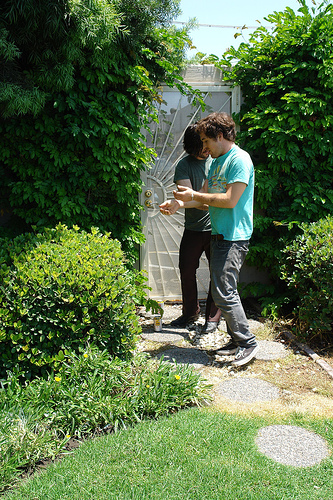

In [366]:
test_image = fli_ds["test"][0]["image"]
test_image

In [369]:
dec.inference(None, test_image, model, processor, temperature=0.9, top_k=50, max_length=50, min_length=7)

Step 0: two
Step 5: two standing two two are are

Final caption: two standing two two are are are


('two standing two two are are are', [1237, 2862, 1237, 1237, 631, 631, 631])

In [308]:
processor.tokenizer.special_tokens_map

{'bos_token': '<|startoftext|>',
 'eos_token': '<|endoftext|>',
 'unk_token': '<|endoftext|>',
 'pad_token': '<|endoftext|>'}

In [430]:
target_output.shape

torch.Size([1, 76])

In [471]:
F.softmax(op, dim=-1).argmax(-1)

tensor([[ 1237,  1656,   530,  1901,  5803,   631,  2862,   530,   320,  4313,
           269, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407]])

In [432]:
processor.tokenizer.all_special_ids

[49406, 49407]

In [433]:
ip = processor(text=["blue"], return_tensors="pt")

In [434]:
ip["input_ids"]

tensor([[49406,  1746, 49407]])

In [435]:
ip["input_ids"][:, 1].unsqueeze(0)

tensor([[1746]])

In [436]:
ip["input_ids"][0][1].unsqueeze(0).unsqueeze(0)

tensor([[1746]])

In [247]:
torch.tensor([[51]])

tensor([[51]])

In [248]:
op = model.text_model(ip["input_ids"][:, 1].unsqueeze(0), output_hidden_states=True)
op.last_hidden_state.shape

torch.Size([1, 1, 512])

In [259]:
processor.tokenizer.decode([ 1237,  1656,  51,  1901,  5803,   631,  5803,   530,   320,  4313,
           269])

'two men Tgreen shirts are shirts in a yard .'

In [461]:
op.argmax(dim=-1)

tensor([[ 1237,  1656,   530,  1901,   269,   631,  2862,   530,   530,  4313,
           269, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407]])

In [472]:
processor.tokenizer.batch_decode(op.argmax(dim=-1).tolist(), skip_special_tokens=True)

['two men in green shirts are standing in a yard .']

In [153]:
b, seq, voc = op.shape
op.shape

torch.Size([1, 76, 49408])

In [161]:
op.view(-1, voc).shape

torch.Size([76, 49408])

In [162]:
target_output.view(-1).shape

torch.Size([76])

In [164]:
criterion = nn.CrossEntropyLoss()

In [165]:
target_output = target_output.to(torch.long).squeeze(-1)  # Ensure correct dtype and shape

# Flatten both tensors
loss = criterion(op.view(-1, op.size(-1)), target_output.view(-1))

In [166]:
loss

tensor(10.9592, grad_fn=<NllLossBackward0>)

In [163]:
cri(op.view(-1, voc), target_output.squeeze())

RuntimeError: expected scalar type Long but found Float